<a href="https://colab.research.google.com/github/KhuzaimaHassan/AI-and-ES/blob/main/Lab7_AI_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv('drug200.csv')

df['Drug'].unique()
df['Drug'].value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [ ]:
ls = []

for drugs in ['drugA', 'drugB', 'drugC']:
  ls.append(df[df['Drug'] == drugs])
tempy = df[df['Drug'] == 'DrugY']
ls.append(tempy)
tempx = df[df['Drug'] == 'drugX']
ls.append(tempx)
ls[4].head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
3,28,F,NORMAL,HIGH,7.798,drugX
5,22,F,NORMAL,HIGH,8.607,drugX
14,50,F,NORMAL,HIGH,12.703,drugX


In [ ]:
dataframe = pd.DataFrame()
for data in ls:
  dataframe = pd.concat([dataframe, data])
  dataframe['Drug'].unique()


In [ ]:
dataframe['Age'].max(), dataframe['Age'].min(),
dataframe['Age'].mean(), dataframe['Age'].median()

(44.315, 45.0)

In [ ]:
print(dataframe.dtypes)

from sklearn.preprocessing import LabelEncoder

encoding_dict = {}

for cols in dataframe.columns:
  if dataframe[cols].dtype == object:
    obj = LabelEncoder()
    dataframe[cols] = obj.fit_transform(dataframe[cols])
    encoding_dict[cols] = obj
  encoding_dict

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


[4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['drugX'], dtype=object)

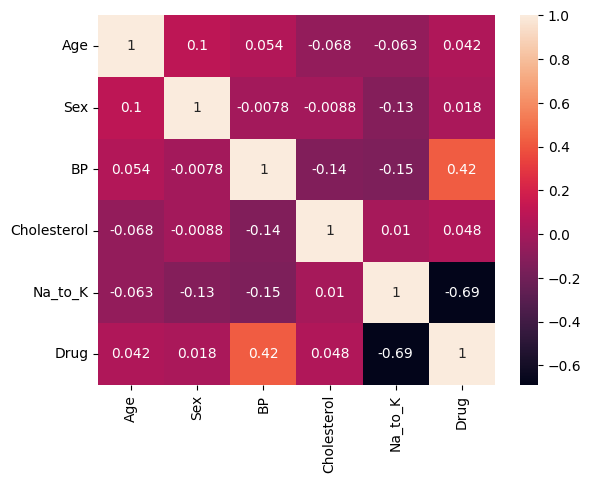

In [ ]:
#Visualize Correlation Matrix
sns.heatmap(dataframe.corr(), annot=True)
#Data Preprocessing for Model Training
dataframe.drop(columns=['Age'], inplace=True)
X = dataframe.drop(columns=['Drug'])
Y = dataframe['Drug']
#Train-Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.1, random_state=9, stratify=Y)
#Train SVM Model
from sklearn.svm import SVC
model = SVC()
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
#Predict New Data
output = model.predict(np.array([[0, 0, 0, 11.262]]))
print(output)
encoding_dict['Drug'].inverse_transform(output)

In [ ]:
#Evaluate Model Performance

from sklearn.metrics import precision_recall_fscore_support, classification_report

precision, recall, fscore, support = precision_recall_fscore_support(ytest, pred)

#Detailed Performance Report

for class_label, p, r, f, s in zip(range(len(precision)), precision, recall, fscore, support):
  print(f"Class: {class_label}")
  print(f"Precision: {p:.3f}")
  print(f"Recall: {r:.3f}")
  print(f"F1-score: {f:.3f}")
  print(f"Support: {s}\n")
print("Confusion Matrix:\n", confusion_matrix(ytest,pred))
#Generate Classification Report

print(classification_report(ytest, pred))

plt.show()

Class: 0
Precision: 0.900
Recall: 1.000
F1-score: 0.947
Support: 9

Class: 1
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 2

Class: 2
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 2

Class: 3
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 2

Class: 4
Precision: 0.500
Recall: 1.000
F1-score: 0.667
Support: 5

Confusion Matrix:
 [[9 0 0 0 0]
 [0 0 0 0 2]
 [1 0 0 0 1]
 [0 0 0 0 2]
 [0 0 0 0 5]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.50      1.00      0.67         5

    accuracy                           0.70        20
   macro avg       0.28      0.40      0.32        20
weighted avg       0.53      0.70      0.59        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

[1 0]
Outcome
0    500
1    268
Name: count, dtype: int64
Correlation Matrix



<Axes: >

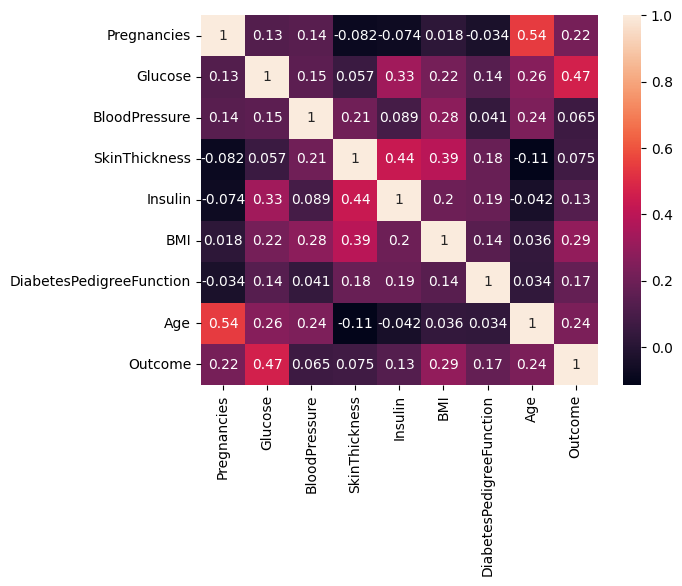

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Pima Indians Diabetes Dataset from a CSV file
# You can download this dataset from online sources like Kaggle if needed.
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv", header=None)
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
print(data['Outcome'].unique())
print(data['Outcome'].value_counts())

# Split features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Visualize Correlation Matrix
print('Correlation Matrix\n')
sns.heatmap(data.corr(), annot=True)



In [ ]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better performance with SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM classifier with an RBF kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can experiment with C and gamma
svm.fit(X_train, y_train)

# New data sample for prediction (replace values with actual feature values)
# [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
new_data = np.array([[2, 130, 80, 30, 85, 33.6, 0.627, 45]])

# Preprocess the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict using the trained model
prediction = svm.predict(new_data_scaled)

# Output the result
print("Prediction (0 = No Diabetes, 1 = Diabetes):", prediction[0])
# Predict on test set
y_pred = svm.predict(X_test)

# Evaluate model performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Prediction (0 = No Diabetes, 1 = Diabetes): 1

Accuracy: 0.7337662337662337

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2

Correlation Matrix



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recommended Movies:
    Genre  Director  Actors  Popularity
0      1         2       3           6
2      3         1       2           9


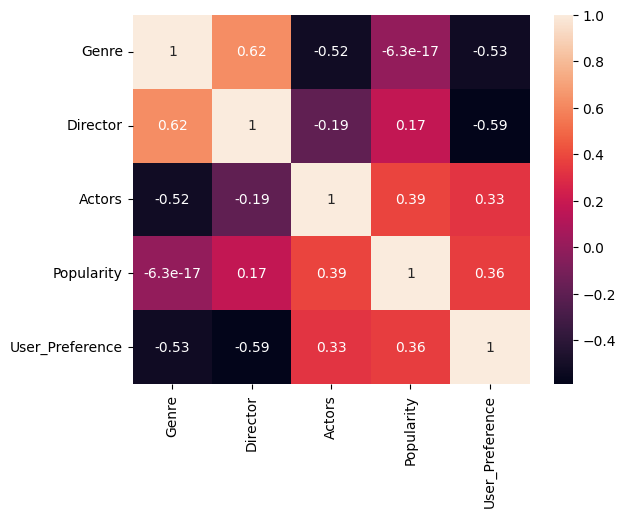

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Sample data creation: synthetic dataset with movie features and user preferences
# Columns: ['Genre', 'Director', 'Actors', 'Popularity', 'User_Preference']
# For simplicity, we'll use numerical representations for categorical data.
data = pd.DataFrame({
    'Genre': [1, 2, 3, 1, 2, 3, 1, 2, 3, 2],    # Example genres represented numerically
    'Director': [1, 1, 2, 2, 3, 3, 1, 2, 3, 1],  # Director IDs
    'Actors': [1, 2, 1, 3, 2, 1, 2, 3, 1, 2],    # Lead actor IDs
    'Popularity': [7, 5, 6, 8, 6, 7, 5, 9, 7, 8], # Popularity rating
    'User_Preference': [1, 0, 1, 1, 0, 0, 1, 1, 0, 1] # User likes (1) or dislikes (0)
})

# Split features and target
X = data.drop('User_Preference', axis=1)
y = data['User_Preference']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Predict on new movies to recommend those the user would likely enjoy
new_movies = pd.DataFrame({
    'Genre': [1, 2, 3],
    'Director': [2, 3, 1],
    'Actors': [3, 1, 2],
    'Popularity': [6, 7, 9]
})
# Visualize Correlation Matrix
print('Correlation Matrix\n')
sns.heatmap(data.corr(), annot=True)

# Predict the user's preference for new movies
recommendations = svm.predict(new_movies)

# Output recommended movies
recommended_movies = new_movies[recommendations == 1]
print("Recommended Movies:\n", recommended_movies)


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Convert target labels to integer format
y = y.astype(np.uint8)

#  Use only a subset of data for faster computation (optional)
# X_sample, _, y_sample, _ = train_test_split(X, y, train_size=10000, random_state=42)

# Scale the data for better performance with SVM
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)  # Reduce to 50 components
X_pca = pca.fit_transform(X_sample_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model (using LinearSVC for faster training)
svm = LinearSVC(C=1.0, max_iter=10000)  # Increase max_iter to ensure convergence
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

correlation_matrix = pd.DataFrame(X_pca).corr()

# Plot the correlation matrix
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Matrix of PCA Components")
# plt.show()

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Fetch a new set of samples from MNIST (different from your training sample)
_, X_new, _, y_new = train_test_split(X, y, train_size=5, random_state=100)

# Scale and apply PCA
X_new_scaled = scaler.transform(X_new)
X_new_pca = pca.transform(X_new_scaled)

# Predict
new_predictions = svm.predict(X_new_pca)
print("Predicted labels for MNIST test data:", new_predictions)
print("Actual labels:", y_new[:5].values)  # Compare to actual labels if desired

# Generate 5 new random samples in the same format as MNIST
new_data = np.random.rand(5, 784) * 255  # Pixel values are between 0 and 255

# Convert to the same format (optional scaling and PCA)
new_data_scaled = scaler.transform(new_data)
new_data_pca = pca.transform(new_data_scaled)

# Predict using the trained model
new_predictions = svm.predict(new_data_pca)
print("Predicted labels for synthetic new data:", new_predictions)



Accuracy: 0.8924285714285715
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1343
           1       0.93      0.97      0.95      1600
           2       0.88      0.87      0.88      1380
           3       0.86      0.86      0.86      1433
           4       0.88      0.90      0.89      1295
           5       0.85      0.81      0.83      1273
           6       0.93      0.95      0.94      1396
           7       0.91      0.92      0.91      1503
           8       0.86      0.80      0.83      1357
           9       0.86      0.85      0.86      1420

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000

Predicted labels for MNIST test data: [3 1 6 ... 0 7 0]
Actual labels: [3 1 6 7 9]
Predicted labels for synthetic new data: [7 7 7 4 5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Convert target labels to integer format
y = y.astype(np.uint8)

# Use only a subset of data for faster computation
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=10000, random_state=42)

# Scale the data for better performance with SVM
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100)  # Reduce to 50 components
X_pca = pca.fit_transform(X_sample_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_sample, test_size=0.2, random_state=42)

# Initialize and train the SVM model (using LinearSVC for faster training)
svm = LinearSVC(C=1.0, max_iter=10000)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# correlation_matrix = pd.DataFrame(X_pca).corr()

# Plot the correlation matrix
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Matrix of PCA Components")
# plt.show()

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9005
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       193
           1       0.93      0.97      0.95       243
           2       0.90      0.89      0.89       190
           3       0.84      0.89      0.87       182
           4       0.91      0.94      0.92       187
           5       0.91      0.82      0.86       190
           6       0.99      0.92      0.95       221
           7       0.90      0.88      0.89       208
           8       0.85      0.84      0.85       197
           9       0.83      0.87      0.85       189

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [ ]:
# Fetch a new set of samples from MNIST (different from your training sample)
_, X_new, _, y_new = train_test_split(X, y, train_size=5, random_state=100)

# Scale and apply PCA
X_new_scaled = scaler.transform(X_new)
X_new_pca = pca.transform(X_new_scaled)

# Predict
new_predictions = svm.predict(X_new_pca)
print("Predicted labels for MNIST test data:", new_predictions)
print("Actual labels:", y_new[:5].values)  # Compare to actual labels if desired


Predicted labels for MNIST test data: [3 1 6 ... 0 7 0]
Actual labels: [3 1 6 7 9]


In [ ]:
import numpy as np
import pandas as pd
# Combine both datasets
combined_data = np.vstack((X_sample, X_new))
combined_labels = np.concatenate((y_sample, y_new))

# Check for duplicates
unique_data, unique_indices = np.unique(combined_data, axis=0, return_index=True)

# Count duplicates
duplicates_count = combined_data.shape[0] - unique_indices.size
print(f"Number of duplicate samples: {duplicates_count}")

# Check the unique labels for both samples
print("Unique labels in X_sample:", np.unique(y_sample))
print("Unique labels in X_new:", np.unique(y_new))


Number of duplicate samples: 9998
Unique labels in X_sample: [0 1 2 3 4 5 6 7 8 9]
Unique labels in X_new: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Sample data creation: synthetic dataset with movie features and user preferences
# Columns: ['Genre', 'Director', 'Actors', 'Popularity', 'User_Preference']
# For simplicity, we'll use numerical representations for categorical data.
data = pd.DataFrame({
    'Genre': [1, 2, 3, 1, 2, 3, 1, 2, 3, 2],    # Example genres represented numerically
    'Director': [1, 1, 2, 2, 3, 3, 1, 2, 3, 1],  # Director IDs
    'Actors': [1, 2, 1, 3, 2, 1, 2, 3, 1, 2],    # Lead actor IDs
    'Popularity': [7, 5, 6, 8, 6, 7, 5, 9, 7, 8], # Popularity rating
    'User_Preference': [1, 0, 1, 1, 0, 0, 1, 1, 0, 1] # User likes (1) or dislikes (0)
})

# Split features and target
X = data.drop('User_Preference', axis=1)
y = data['User_Preference']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Predict on new movies to recommend those the user would likely enjoy
new_movies = pd.DataFrame({
    'Genre': [1, 2, 3],
    'Director': [2, 3, 1],
    'Actors': [3, 1, 2],
    'Popularity': [6, 7, 9]
})
# Visualize Correlation Matrix
print('Correlation Matrix\n')
sns.heatmap(data.corr(), annot=True)

# Predict the user's preference for new movies
recommendations = svm.predict(new_movies)

# Output recommended movies
recommended_movies = new_movies[recommendations == 1]
print("Recommended Movies:\n", recommended_movies)


In [ ]:
import pandas as pd
data=pd.read_csv('movies_metadata.csv')
print(data.head())

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

<ipython-input-6-c71e74e406c6>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('movies_metadata.csv')


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
import ast

# Load the movies metadata and ratings datasets
movies = pd.read_csv('movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('ratings_small.csv')

# Step 1: Data Preprocessing for Movies Metadata
# Extract genres from JSON-like strings in movies metadata
def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [genre['name'] for genre in genres]
    except:
        return []

# Apply function to the genres column
movies['genres'] = movies['genres'].apply(extract_genres)

# Select relevant features and encode genres
movies = movies[['id', 'genres', 'vote_average', 'popularity']].dropna()
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
movies.dropna(subset=['id'], inplace=True)
movies['id'] = movies['id'].astype(int)

# One-hot encode genres using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movies['genres'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
movies = pd.concat([movies.reset_index(drop=True), genre_df], axis=1).drop(columns=['genres'])

# Step 2: Aggregating Ratings for Movie Recommendation Labels
ratings_summary = ratings.groupby('movieId')['rating'].mean().reset_index()
ratings_summary['recommended'] = ratings_summary['rating'].apply(lambda x: 1 if x >= 3.5 else 0)

# Merge movies and ratings data based on movie ID
merged_data = pd.merge(movies, ratings_summary, left_on='id', right_on='movieId', how='inner')
merged_data = merged_data.drop(columns=['movieId', 'rating'])

# Step 3: Split the data into training and testing sets
X = merged_data.drop(columns=['recommended'])
y = merged_data['recommended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the SVM model
model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5326278659611993
              precision    recall  f1-score   support

           0       0.50      0.31      0.38       265
           1       0.55      0.73      0.63       302

    accuracy                           0.53       567
   macro avg       0.52      0.52      0.50       567
weighted avg       0.52      0.53      0.51       567

